# COVID19 Data Analysis Project
------------------------------------------

## Question: Is there any relationship between the spread of COVID-19 in a country with respect to how happy its people are living in the respective country.

Data Analysis techniques used in the project:
- Importing datasets from sources
- Preparing the datasets for the analysis by dropping columns and aggregating rows
- Finding and calculating a good measure for the analysis
- Merging datasets and finding correlations between the datasets
- Visualizing results using Seaborn

### Importing modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Part 1

### Importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Downloads" folder. 


In [2]:
corona_dataset_csv = pd.read_csv("covid19_Confirmed_dataset.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


#### Checking the shape of the dataframe

In [3]:
corona_dataset_csv.shape

(266, 104)

### Deleting useless columns

In [4]:
corona_dataset_csv.drop(["Lat", "Long"], axis = 1, inplace = True)

In [5]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Aggregating the rows by country

In [6]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum(numeric_only = True)

In [7]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_aggregated.shape

(187, 100)

### Visualizing data of different countries
visualization always helps for better understanding of our data.

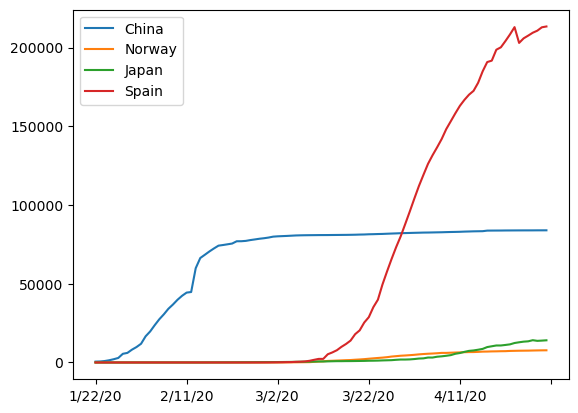

In [9]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Norway"].plot()
corona_dataset_aggregated.loc["Japan"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

### Finding a good measure 
we need to find a good measure represented as a number, to describe the spread of the virus in a country. 

Take China as an example, we notice that there is a steep incline in the number of confirmed cases especially from late January 2020 to late February 2020, indicating that the virus was spreading significant speed during that time.  

<AxesSubplot: >

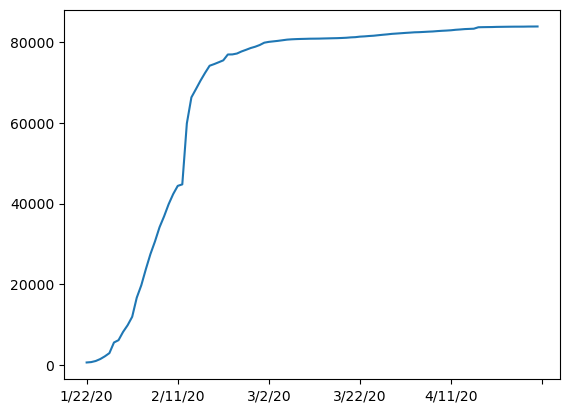

In [10]:
corona_dataset_aggregated.loc['China'].plot()

If we take a closer look at the first three days of the number of confirmed cases in China (from 1/22/2020 - 1/24/2020) 

<AxesSubplot: >

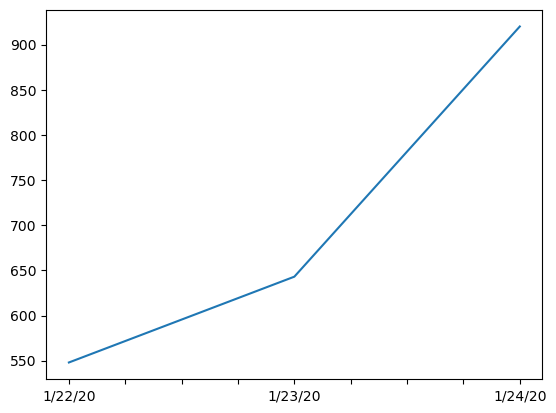

In [11]:
corona_dataset_aggregated.loc["China"][:3].plot()

### Caculating the first derivative of the curve

<AxesSubplot: >

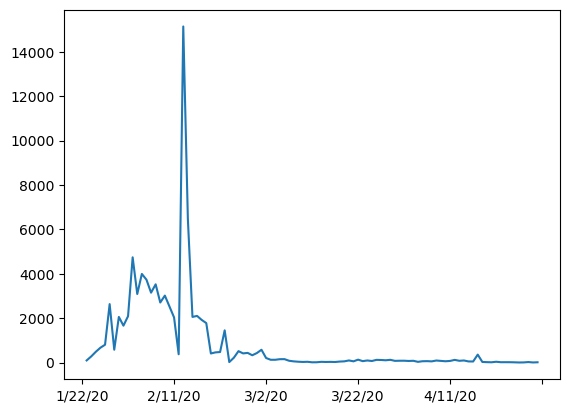

In [12]:
corona_dataset_aggregated.loc["China"].diff().plot()

Here we got the infection rate for our entire observed period (1/22/2020 - 4/30/2020).

### Find maxmimum infection rate for specific countries

Maximum infection rate in **China** (the date with the highest number of new infection):

In [13]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

Maximum infection rate in **Norway**:

In [14]:
corona_dataset_aggregated.loc["Norway"].diff().max()

386.0

Maximum infection rate in **Spain**:

In [15]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Finding the maximum infection rate for all countries

In [16]:
countries = list(corona_dataset_aggregated.index)

# Create new empty list
max_infection_rates = []

# Loop over every country in "corona_dataset_aggregated" dataset
# Append the value of the max infection rate for each country to the empty list
for c in countries: 
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())

# Add the new column to the dataframe
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [17]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Creating a new dataframe with max infection rate column 

In [18]:
# Create a new dataframe with "Country/Region" as index and the "max_infection_rate" column
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [19]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Part 2: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns and dropping unnecessary columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Importing the World Happiness Report dataset

In [20]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [21]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Dropping the useless columns 

In [22]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [23]:
happiness_report_csv.drop(useless_cols, axis = 1, inplace = True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe

In [24]:
happiness_report_csv.set_index("Country or region", inplace = True)

In [25]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Joining the two prepared datasets

#### Corona Dataset :

In [26]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [27]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [28]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [29]:
happiness_report_csv.shape

(156, 4)

In [30]:
# Merge the two datasets using inner join 
data = corona_data.join(happiness_report_csv, how = "inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### The correlation matrix 

In [31]:
# Get pairwise correlation of columns using the pearson standard correlation coefficient
data.corr(method='pearson')

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


## Visualization of the results
An analysis is not finished unless the results are visualized in terms of figures and graphs so that the audience can be easily understood.

In [32]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Indicator 1: GDP per capita vs maximum Infection rate

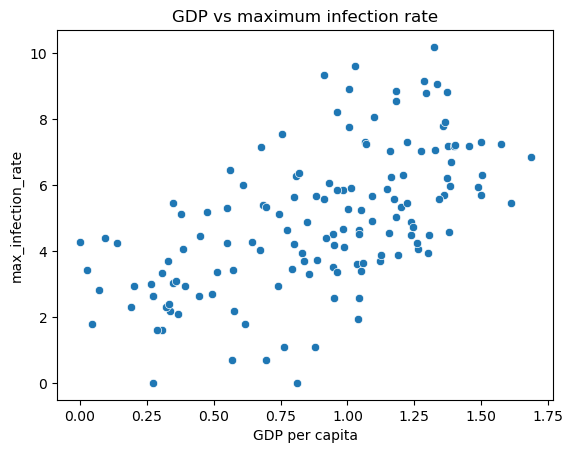

In [33]:
# GDP per capita in the x-axis
# max_infection_rate in the y-axis

# use Seaborn module's scatterplot() method
sns.scatterplot( 
    x = data["GDP per capita"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

# set the title 
plt.title("GDP vs maximum infection rate")

plt.show()

<AxesSubplot: xlabel='GDP per capita', ylabel='max_infection_rate'>

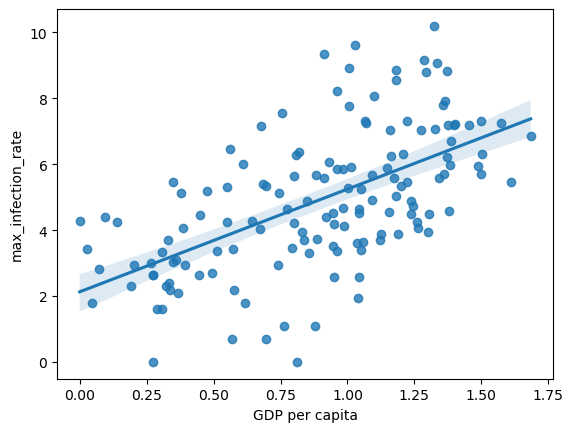

In [34]:
# we can use regplot method in seaborn for better visualisation
# The regplot method plots the data model to fit linear regression
sns.regplot(
    x = data["GDP per capita"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

### Indicator 2: Social support vs maximum Infection rate

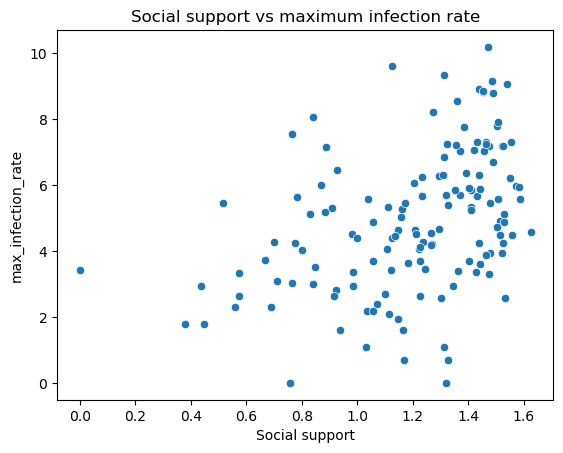

In [35]:
# using scatterplot method
sns.scatterplot( 
    x = data["Social support"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

# set the title 
plt.title("Social support vs maximum infection rate")

plt.show()

<AxesSubplot: xlabel='Social support', ylabel='max_infection_rate'>

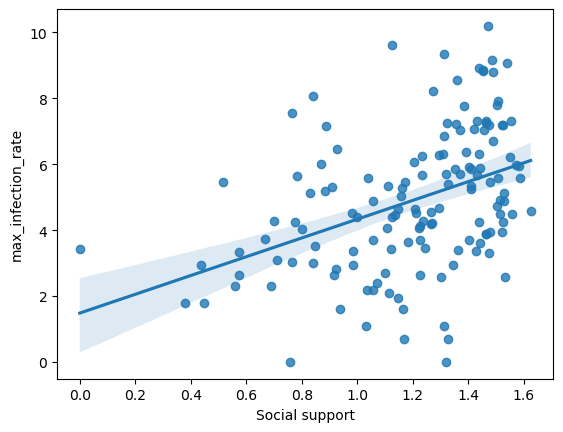

In [36]:
# using regplot method
sns.regplot(
    x = data["Social support"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

### Indicator 3: Healthy life expectancy vs maximum Infection rate

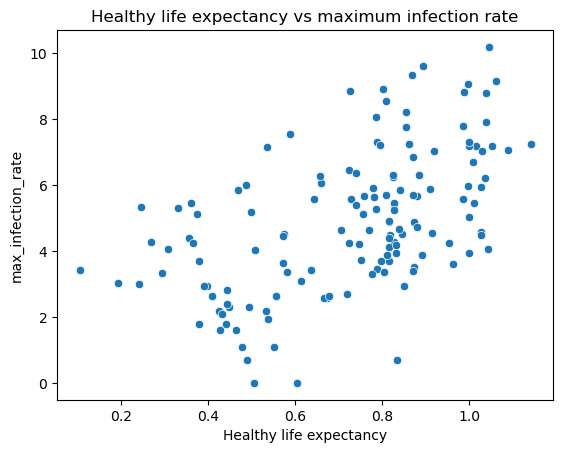

In [37]:
# using scatterplot method
sns.scatterplot( 
    x = data["Healthy life expectancy"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

# set the title 
plt.title("Healthy life expectancy vs maximum infection rate")

plt.show()

<AxesSubplot: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

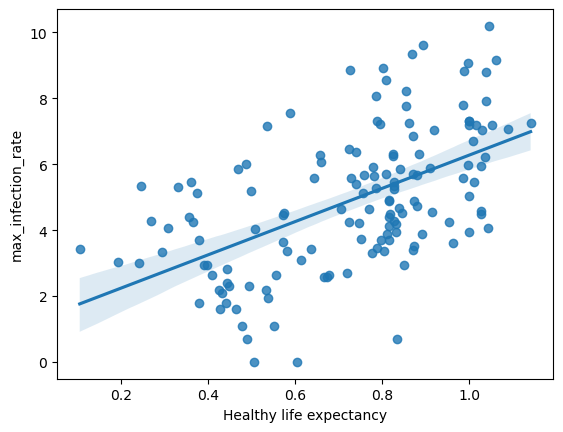

In [38]:
# using regplot method
sns.regplot(
    x = data["Healthy life expectancy"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

### Indicator 4: Freedom to make life choices vs maximum Infection rate

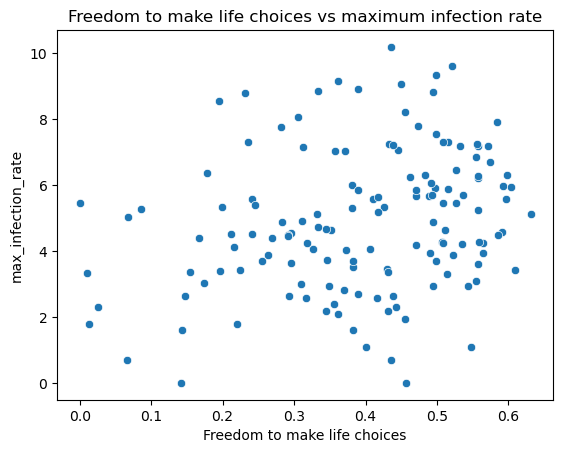

In [39]:
# using scatterplot method
sns.scatterplot( 
    x = data["Freedom to make life choices"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

# set the title 
plt.title("Freedom to make life choices vs maximum infection rate")

plt.show()

<AxesSubplot: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

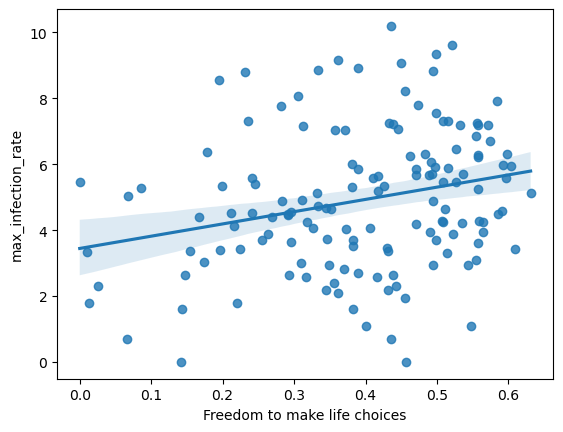

In [40]:
# using regplot method
sns.regplot(
    x = data["Freedom to make life choices"], 
    y = np.log(data["max_infection_rate"]) # use logarithmic scale for y-axis
    )

### Analysis results 

**"Is there any relationship between the spread of the virus in a country with respect to how happy its people are living in the respective countries"**

The short answer is yes. 

Our data shows that there is a positive coefficient which indicates that as the value of the independent variable (the 4 happiness indicators - GDP per capita, Social support, Healthy life expectancy and Freedom to make life choices) increases, the mean of the dependent variable (maximum infection rate) also tends to increase. 

As a result, people who live in more developed countries (as they tend to rank higher in the World Happiness Report) are more prone to getting infected with COVID-19 compared to those who live in less developed countries.

However, it is important to bear in mind that there might also be other factors in play which could have affected the results, for example, the lack of testing kits in less developed countries, or the differences in measures each  government takes to control the virus. 

To further examine this topic, it would be valuable to find out if there is any correlations between the culmulative number of deaths from COVID-19 and the happiness indexes from the World Happiness Report. 